# Import Library




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

In [ ]:
df = pd.read_excel("/content/Coffee.xlsx")

df.head(4)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm


In [ ]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [ ]:
# mencari total sales
df['total_sales'] = df['transaction_qty'] * df['unit_price']
sales_per_product = df.groupby('product_id')['total_sales'].sum().reset_index()

# ubah type data
df['transaction_time'] = df['transaction_time'].astype(str)
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

# Membuat variabel datetime
df['datetime'] = df['transaction_date'] + df['transaction_time']

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,datetime
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
 11  total_sales       149116 non-null  float64        
 12  datetime          149116 non-null  datetime64[ns] 
 13  hour              149116 non-null  int32    

# Data Cleaning

In [ ]:
# melihat data yang hilang
df.isnull().sum()

# melihat data duplikasi
df.duplicated().sum()

df.info()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [ ]:
# melihat data duplikasi
df.duplicated().sum()

0

# Exploratory Data Analysis

Identifikasi Masalah

1.   Menganalisis lokasi Coffee Shop yang memiliki penjualan tertinggi dalam rentang waktu 6 bulan
2.   Menganalisis produk apa yang sering dipesan oleh pelanggan berdasarkan rentang waktu per minggu
3.   Menganalisis lokasi coffee shop yang mempunyai penjualan tertinggi dalam sehari dihitung per jam



------------------------------------------------------------------------------------------------------------------------------------------------------

1. Menganalisis lokasi Coffee Shop yang memiliki penjualan tertinggi dalam rentang waktu 6 bulan

In [ ]:
df_location  = df.groupby('store_location').agg({
    'total_sales': 'sum',
    'transaction_id': 'count'
})

df_location

,total_sales,transaction_id
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


In [ ]:
# mencari penjualan harian berdasarkan coffee shop
daily_sales_by_location = df.groupby(['transaction_date', 'store_location'])['total_sales'].sum().unstack()
daily_sales_by_location

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,868.40,851.45,788.35
2023-01-02,925.50,828.80,649.05
2023-01-03,902.75,906.25,756.00
2023-01-04,808.25,781.65,630.20
2023-01-05,903.05,714.90,800.90
...,...,...,...
2023-06-26,1975.10,1746.10,2154.70
2023-06-27,1861.55,1676.70,2437.40
2023-06-28,1758.10,1445.85,1524.95


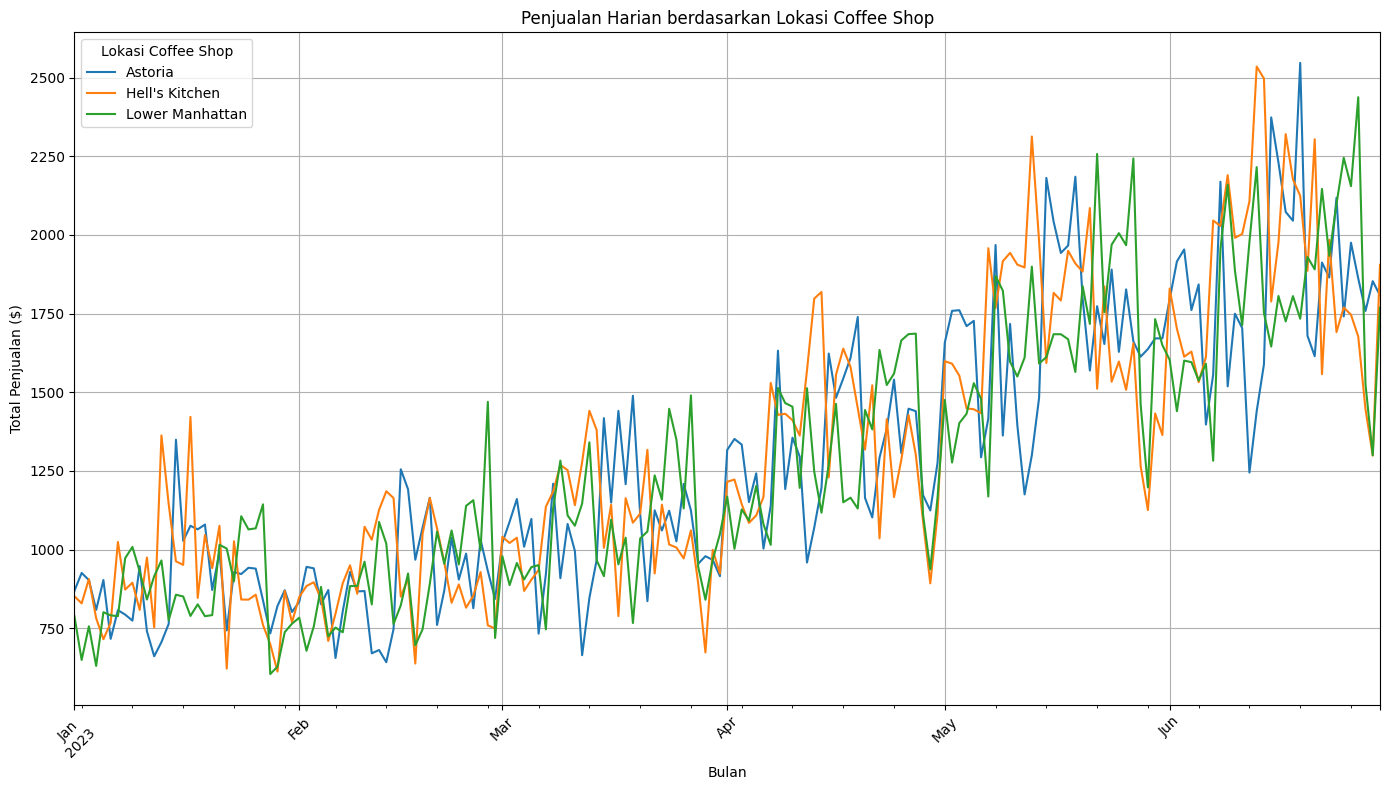

In [ ]:
# Bar chart penjualan harian berdasarkan lokasi coffe shop
daily_sales_by_location.plot(figsize=(14, 8), title='Penjualan Harian berdasarkan Lokasi Coffee Shop')

plt.xlabel('Bulan')
plt.ylabel('Total Penjualan ($)')
plt.legend(title='Lokasi Coffee Shop')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

#Tampilkan plot
plt.show()

2. Menganalisis produk apa yang sering dipesan oleh pelanggan berdasarkan rentang waktu per minggu

In [ ]:
# Membuat variabel baru untuk mengetahui penjualan berdasarkan produk
sales_by_product = df.groupby('product_type').agg({
    'total_sales': 'sum',
    'unit_price': 'mean'
}).sort_values('total_sales', ascending = False)

sales_by_product

,total_sales,unit_price
product_type,,
Barista Espresso,91406.20,3.655200
Brewed Chai tea,77081.95,2.936993
Hot chocolate,72416.00,4.148827
Gourmet brewed coffee,70034.60,2.696641
Brewed Black tea,47932.00,2.744670
Brewed herbal tea,47539.50,2.744731
Premium brewed coffee,38781.15,3.122452
Organic brewed coffee,37746.50,2.898021
Scone,36866.12,3.534638


In [ ]:
# Menampilkan penjualan produk berdasarkan kategori dan tipe produk sebagai gambaran
product_sales = df.groupby(['product_category', 'product_type'])['total_sales'].sum().reset_index()
product_sales

,product_category,product_type,total_sales
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


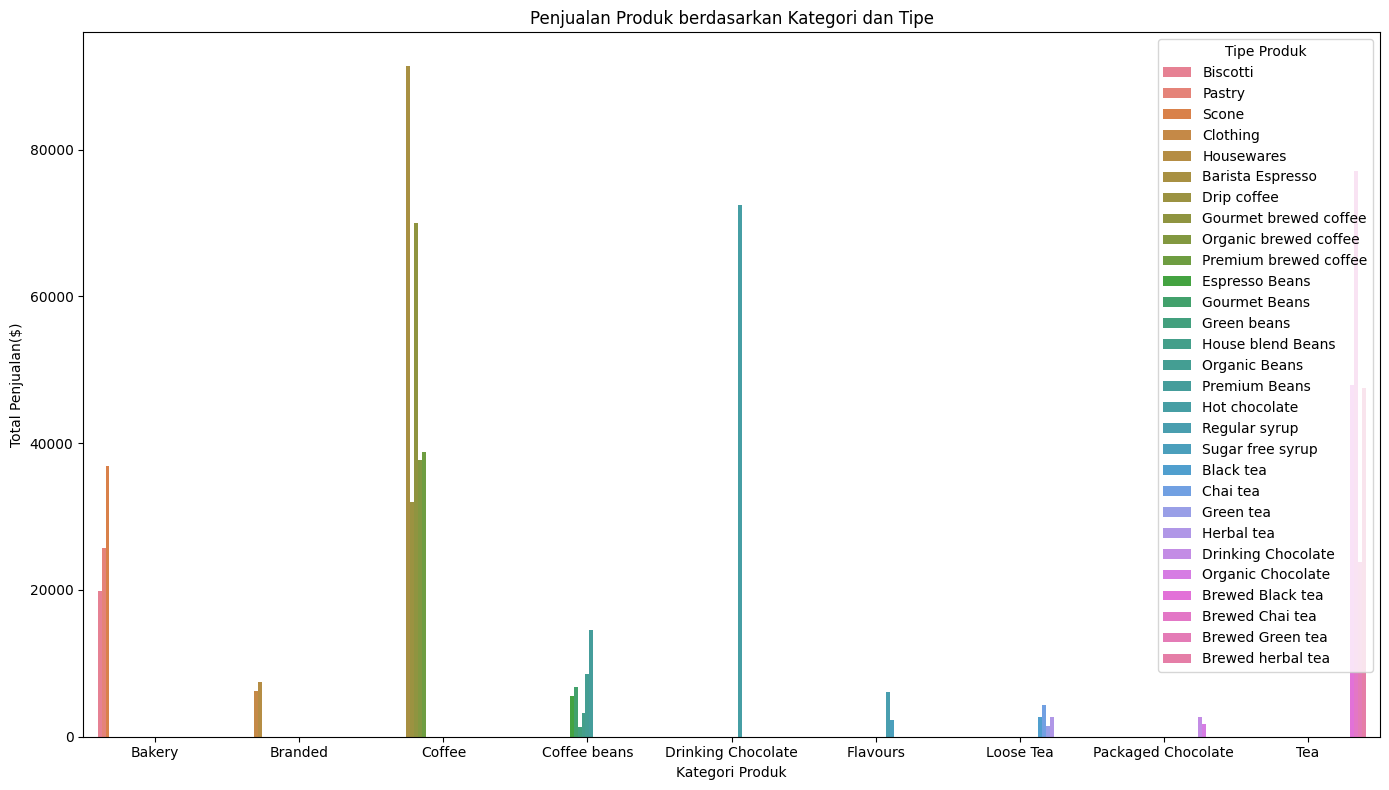

In [ ]:
# Menampilkan bar chart penjualan coffee shop berdasarkan tipe dan kategori produk

plt.figure(figsize=(14, 8))
sns.barplot(data=product_sales, x='product_category', y='total_sales', hue='product_type')

# Tambahkan label dan judul
plt.title('Penjualan Produk berdasarkan Kategori dan Tipe')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan($)')
plt.legend(title='Tipe Produk', loc='upper right')

# Tampilkan Plot
plt.tight_layout()
plt.show()

------------------


3. Menganalisis lokasi coffee shop yang mempunyai penjualan tertinggi dalam sehari dihitung per jam

In [ ]:
# Buat variabel baru untuk mengetahui jam operasional coffee shop
df['hour'] = df['datetime'].dt.hour
hourly_sales_by_product = df.groupby(['hour', 'product_category'])['total_sales'].sum().unstack()


In [ ]:
# Buat variabel baru untuk mengetahui total penjualan setiap coffee shop per jam
hourly_sales_by_location = df.groupby(['store_location', 'hour'])['total_sales'].sum().reset_index()
hourly_sales_by_location

,store_location,hour,total_sales
0,Astoria,7,19028.80
1,Astoria,8,22805.90
2,Astoria,9,23183.57
3,Astoria,10,24426.12
4,Astoria,11,15498.13
5,Astoria,12,15681.20
6,Astoria,13,15947.87
7,Astoria,14,15175.27
8,Astoria,15,15651.95
9,Astoria,16,16110.85


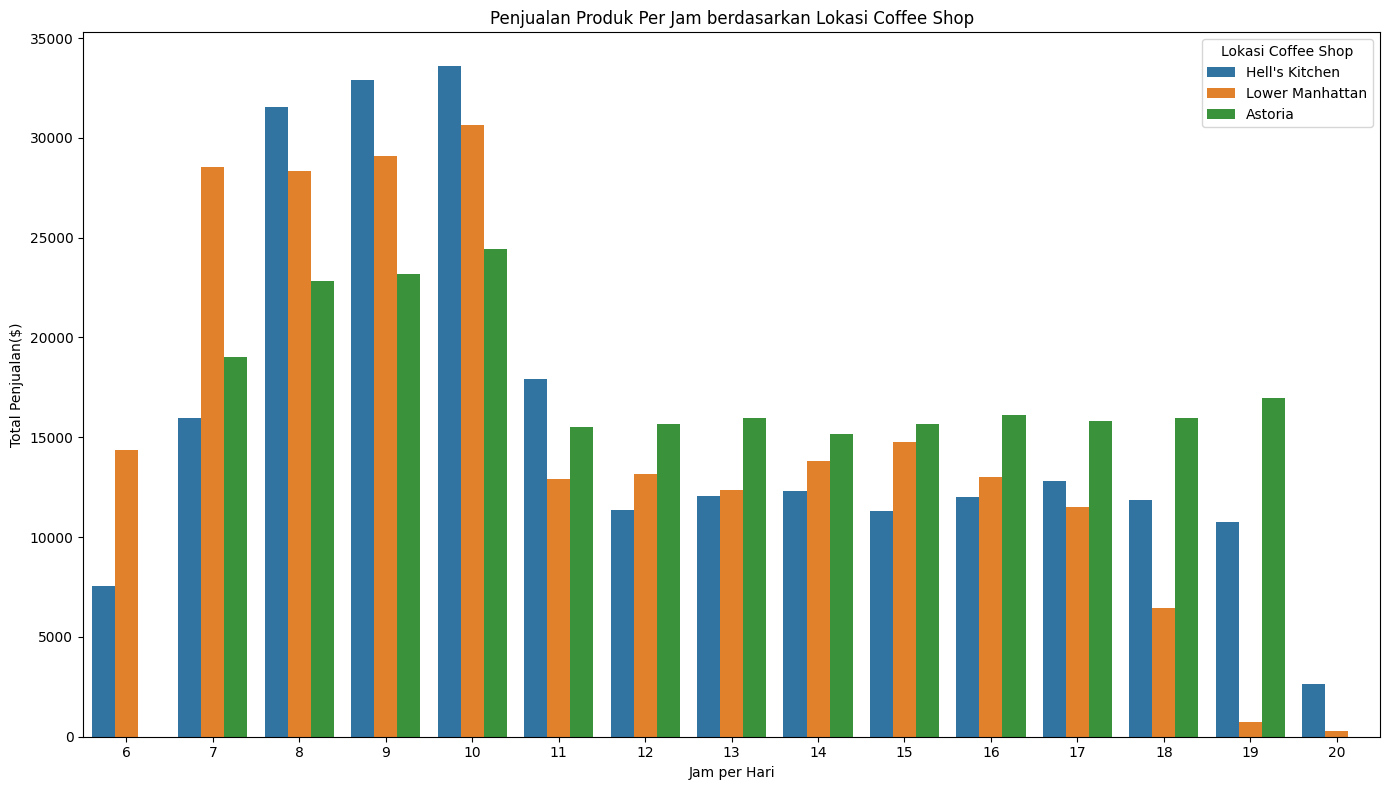

In [ ]:
# membuat chart untuk penjualan produk per jam berdasarkan lokasi coffee shop
plt.figure(figsize=(14, 8))
sns.barplot(data=hourly_sales_by_location, x='hour', y='total_sales', hue='store_location')

# Tambahkan label dan judul
plt.title('Penjualan Produk Per Jam berdasarkan Lokasi Coffee Shop')
plt.xlabel('Jam per Hari')
plt.ylabel('Total Penjualan($)')
plt.legend(title='Lokasi Coffee Shop', loc='upper right')

# Tampilkan Plot

plt.tight_layout()
plt.show()